In [1]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import CSVs

cwd = os.getcwd()
X_train = pd.read_csv(cwd + "\X_train.csv", header = None).values
y_train = pd.read_csv(cwd + "\y_train.csv", header = None).values
X_test = pd.read_csv(cwd + "\X_test.csv", header = None).values
y_test = pd.read_csv(cwd + "\y_test.csv", header = None).values

In [3]:
# Q1.a
# Calculate W_rr

W_rr = []
df_lbd_list = []
lbd_range = range(0,5001)                              

for lbd in lbd_range:
    
    # SVD & Make S^-1_lambda
    U, Slist, V_T = np.linalg.svd(X_train,full_matrices = False)
    
    S = np.diag(Slist/(Slist**2+lbd))
    S2 = np.diag(Slist**2/(Slist**2+lbd))
    
    # df = trace[(X * (XT_X+lbdI)^-1) * XT]
    df_lbd = np.trace(S2) 
    df_lbd_list.append(df_lbd)
    
    # W_RR
    VS = np.matmul(V_T.transpose(),S)
    U_Ty = np.matmul(U.transpose(),y_train)
    
    wRR = np.matmul(VS, U_Ty)
    W_rr.append([i[0] for i in wRR.tolist()])

# End for

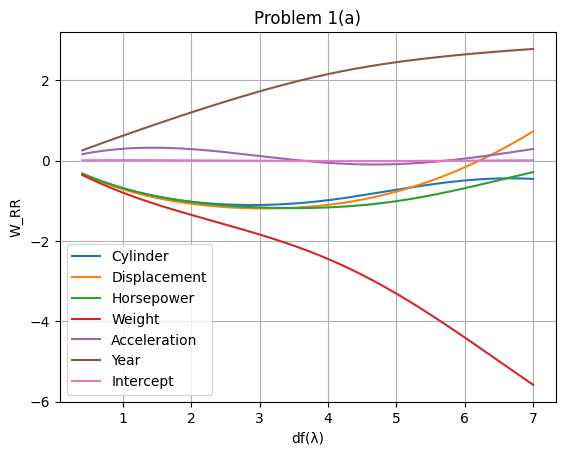

In [4]:
# Post Processing

y = pd.DataFrame(W_rr)

y.columns = ["Cylinder", "Displacement", "Horsepower", "Weight", "Acceleration", "Year", "Intercept"]
y["df(Lambda)"] = df_lbd_list

# Plot
plt.figure()

for i in y.columns[:-1]:
    plt.plot(list(y["df(Lambda)"]), list(y[i]), label = i)
    
#End for

plt.xlabel("df(λ)")
plt.ylabel("W_RR")
plt.legend()
plt.title("Problem 1(a)")
plt.grid()
plt.show()

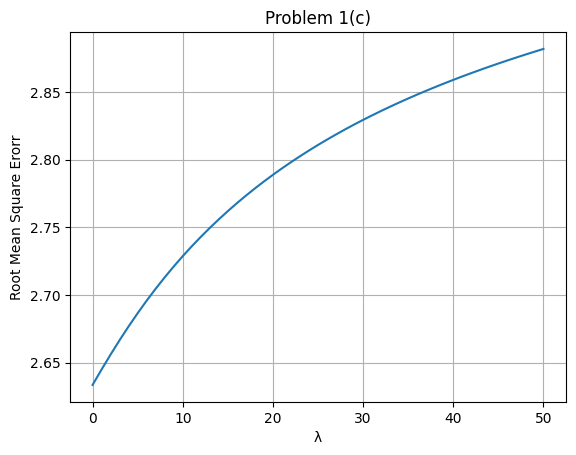

In [5]:
# Q1.c
# Calculate Root Mean Squar Error

y = []
error_list = []
W_rr = []
lbd_range = range(0,51)      


for lbd in lbd_range:
    
    # SVD & Make S^-1_lambda
    U, Slist, V_T = np.linalg.svd(X_train,full_matrices = False)
    
    S = np.diag(Slist/(Slist**2+lbd))
    S2 = np.diag(Slist**2/(Slist**2+lbd))
    
    # W_RR
    VS = np.matmul(V_T.transpose(),S)
    U_Ty = np.matmul(U.transpose(),y_train)
    
    wRR = np.matmul(VS, U_Ty)
    W_rr.append([i[0] for i in wRR.tolist()])
    
    # Predicted Value
    Y = np.matmul(X_test, wRR)
    y.append([i[0] for i in Y.tolist()])
    
    # Calculate Root Mean Square Error
    error = np.sqrt(np.mean(np.square(Y - y_test)))
    error_list.append(error)
    
# End for
    
# Plot
plt.figure()

plt.plot(lbd_range, error_list)
plt.xlabel("λ")
plt.ylabel("Root Mean Square Erorr")
plt.title("Problem 1(c)")
plt.grid()
plt.show()

In [6]:
# Q2

lbd_range = range(0,101)

# Power 1

y1 = []
error_list1 = []
W_rr1 = []   

for lbd in lbd_range:
    
    # SVD & Make S^-1_lambda
    U, Slist, V_T = np.linalg.svd(X_train,full_matrices = False)
    
    S = np.diag(Slist/(Slist**2+lbd))
    
    # W_RR
    VS = np.matmul(V_T.transpose(),S)
    U_Ty = np.matmul(U.transpose(),y_train)
    
    wRR = np.matmul(VS, U_Ty)
    W_rr.append([i[0] for i in wRR.tolist()])
    
    # Predicted Value
    Y = np.matmul(X_test, wRR)
    y.append([i[0] for i in Y.tolist()])
    
    # Calculate Root Mean Square Error
    error = np.sqrt(np.mean(np.square(Y - y_test)))
    error_list1.append(error)
    
# End for

In [7]:
lbd_range = range(0,101)

# Power 2

y2 = []
error_list2 = []
W_rr2 = []   

X_train2 = X_train
X_test2 = X_test

# Standardization
for i in range(6):
    # Calculate Mean and Standard Deviation
    mean = np.mean(np.array(X_train2[:,i])**2)
    sdv = np.sqrt(np.var(np.array(X_train2[:,i])**2))
    
    # Append Standardized X to Train & Test sets
    X_train2 = np.append(X_train2, np.array((X_train2[:,i]**2 - mean)/sdv).reshape(X_train2[:,i].shape[0], 1),1)
    X_test2 = np.append(X_test2, np.array((X_test2[:,i]**2 - mean)/sdv).reshape(X_test2[:,i].shape[0], 1),1)

for lbd in lbd_range:
    
    # SVD & Make S^-1_lambda
    U, Slist, V_T = np.linalg.svd(X_train2,full_matrices = False)
    
    S = np.diag(Slist/(Slist**2+lbd))
    
    # W_RR
    VS = np.matmul(V_T.transpose(),S)
    U_Ty = np.matmul(U.transpose(),y_train)
    
    wRR = np.matmul(VS, U_Ty)
    W_rr.append([i[0] for i in wRR.tolist()])
    
    # Predicted Value
    Y = np.matmul(X_test2, wRR)
    y2.append([i[0] for i in Y.tolist()])
    
    # Calculate Root Mean Square Error
    error = np.sqrt(np.mean(np.square(Y - y_test)))
    error_list2.append(error)
    
# End for

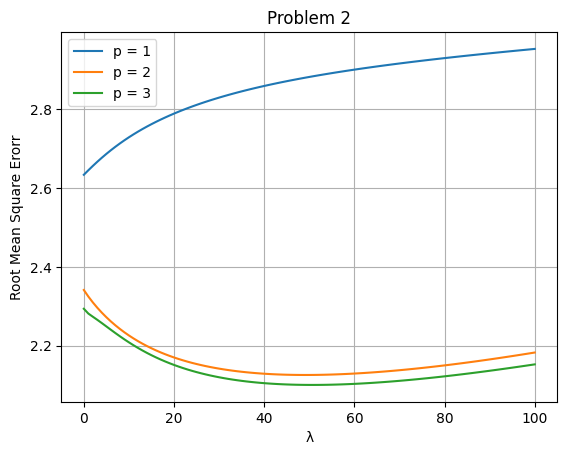

In [8]:
lbd_range = range(0,101)

# Power 3

y3 = []
error_list3 = []
W_rr3 = []   

X_train3 = X_train
X_test3 = X_test

# Standardization
# j = 2,3
for j in range (2,4):
    for i in range(6):
        # Calculate Mean and Standard Deviation
        mean = np.mean(np.array(X_train3[:,i])**j)
        sdv = np.sqrt(np.var(np.array(X_train3[:,i])**j))
        
        # Append Standardized X to Train & Test sets
        X_train3 = np.append(X_train3, np.array((X_train3[:,i]**j - mean)/sdv).reshape(X_train3[:,i].shape[0], 1),1)
        X_test3 = np.append(X_test3, np.array((X_test3[:,i]**j - mean)/sdv).reshape(X_test3[:,i].shape[0], 1),1)

pd.DataFrame(X_train3).to_csv("MyDa3.csv")

for lbd in lbd_range:
    
    # SVD & Make S^-1_lambda
    U, Slist, V_T = np.linalg.svd(X_train3,full_matrices = False)
    
    S = np.diag(Slist/(Slist**2+lbd))
    
    # W_RR
    VS = np.matmul(V_T.transpose(),S)
    U_Ty = np.matmul(U.transpose(),y_train)
    
    wRR = np.matmul(VS, U_Ty)
    W_rr.append([i[0] for i in wRR.tolist()])
    
    # Predicted Value
    Y = np.matmul(X_test3, wRR)
    y3.append([i[0] for i in Y.tolist()])
    
    # Calculate Root Mean Square Error
    error = np.sqrt(np.mean(np.square(Y - y_test)))
    error_list3.append(error)
    
# End for

# Plot
plt.figure()

plt.plot(lbd_range, error_list1, label = "p = 1")
plt.plot(lbd_range, error_list2, label = "p = 2")
plt.plot(lbd_range, error_list3, label = "p = 3")
plt.xlabel("λ")
plt.ylabel("Root Mean Square Erorr")
plt.title("Problem 2")
plt.grid()
plt.legend()
plt.show()